In [18]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



# Load the datasets
train_data_path = r'C:\Users\HP\Downloads\i2\fraudTrain.csv'
test_data_path = r'C:\Users\HP\Downloads\i2\fraudTest.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)



# Separate features and target
X_train = train_data.drop('is_fraud', axis=1)  # Assuming 'target' is the label column
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

# Data Preprocessing
# Handle missing values
X_train.fillna(method='ffill', inplace=True)
X_test.fillna(method='ffill', inplace=True)



# Frequency Encoding for categorical variables
def frequency_encoding(df, column):
    fe = df[column].value_counts().to_dict()
    df[column] = df[column].map(fe)
    return df

categorical_columns = X_train.select_dtypes(include=['object']).columns

for column in categorical_columns:
    X_train = frequency_encoding(X_train, column)
    X_test = frequency_encoding(X_test, column)



# Normalize/scale features (optional, based on your dataset)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

len(train_data)

len(test_data)



555719

Accuracy: 99.44%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.28      0.28      0.28      2145

    accuracy                           0.99    555719
   macro avg       0.64      0.64      0.64    555719
weighted avg       0.99      0.99      0.99    555719

ROC AUC Score: 0.8538


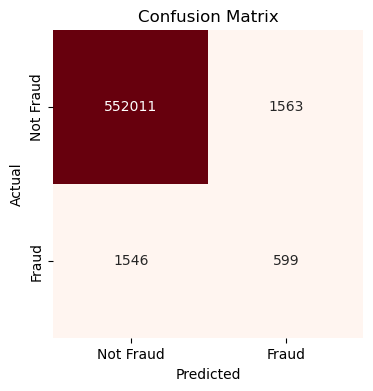

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize Logistic Regression
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, n_jobs=-1)

# Train the model
logreg.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the accuracy in a formatted string
print(f"Accuracy: {accuracy:.2f}%")

# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# ROC AUC Score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}')

# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

